Anomaly Detected: Value: -0.949212145039795, Z-score: -2.22629975149209
Anomaly Detected: Value: 1.8452559277446547, Z-score: 2.2125955169512403
Anomaly Detected: Value: 2.1530732926425222, Z-score: 2.555464066802618
Anomaly Detected: Value: 11.48077786495621, Z-score: 6.672275842641001
Anomaly Detected: Value: -0.721730194685671, Z-score: -2.001715947142708
Anomaly Detected: Value: -0.850978907823302, Z-score: -2.063686913075753
Anomaly Detected: Value: -1.1690301263094331, Z-score: -2.439218926646388
Anomaly Detected: Value: -1.271102782368593, Z-score: -2.3146922402752583
Anomaly Detected: Value: -1.1790559781299967, Z-score: -2.1601159407273234
Anomaly Detected: Value: -1.3008240463342764, Z-score: -2.1732095877893096
Anomaly Detected: Value: 9.243721522484806, Z-score: 6.464530892408057
Anomaly Detected: Value: 0.26567183356665147, Z-score: 2.771987152280881
Anomaly Detected: Value: -0.1470134809249063, Z-score: 2.0624957197174734
Anomaly Detected: Value: -2.163898300799972, Z-sco

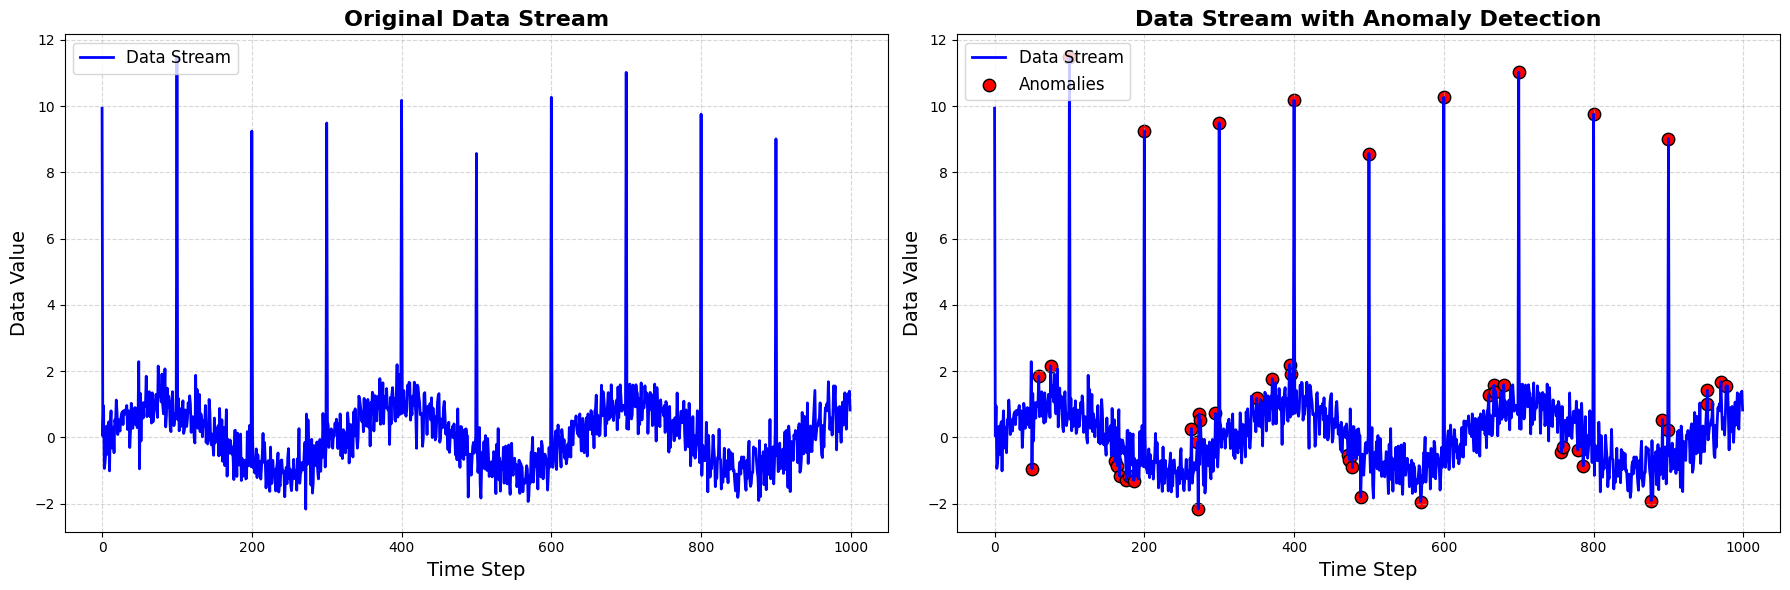

Comparison plot saved as comparison_plot.png


In [23]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def generate_data_stream(length=1000, seasonality=True, noise_level=0.5):
    """
    Generates a simulated data stream with optional seasonality and noise.

    Parameters:
    - length: Number of data points in the stream.
    - seasonality: Boolean, if True, adds seasonal patterns to the data.
    - noise_level: Level of random noise to add to the data.

    Yields:
    - Data point (float) from the simulated stream.
    """
    time = np.arange(length)
    seasonal_pattern = np.sin(time / 50) if seasonality else np.zeros(length)

    for t in range(length):
        if t % 100 == 0:
            value = seasonal_pattern[t] + np.random.normal(0, noise_level) + 10
        else:
            value = seasonal_pattern[t] + np.random.normal(0, noise_level)

        yield value

def detect_anomaly(stream, window_size=50, threshold=2, alpha=0.3):
    """
    Detect anomalies in a data stream using a Z-score based method.

    Parameters:
    - stream: A generator yielding data points.
    - window_size: The number of previous values to consider for Z-score calculation.
    - threshold: The Z-score threshold above which points are considered anomalies.
    - alpha: Smoothing factor for Exponential Moving Average.

    Returns:
    - Tuple of (values, detected_anomalies) where detected_anomalies is a list of flagged anomalies.
    """
    values = deque(maxlen=window_size)
    ema = None
    detected_anomalies = []
    all_values = []

    for value in stream:
        all_values.append(value)
        values.append(value)

        if ema is None:
            ema = value
        else:
            ema = alpha * value + (1 - alpha) * ema

        if len(values) == window_size:
            rolling_mean = np.mean(values)
            rolling_std = np.std(values)

            if rolling_std != 0:
                z_score = (value - rolling_mean) / rolling_std
            else:
                z_score = 0

            if abs(z_score) > threshold:
                detected_anomalies.append(value)
                print(f"Anomaly Detected: Value: {value}, Z-score: {z_score}")

    return all_values, detected_anomalies

def plot_before_and_after(all_values, detected_anomalies, output_file="comparison_plot.png"):
    """
    Plots the original data stream and the data stream with anomalies highlighted.

    Parameters:
    - all_values: The complete data stream.
    - detected_anomalies: List of anomalies to highlight in the second plot.
    - output_file: Filename to save the comparison plot.
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create two side-by-side plots

    # Plot 1: Original Data Stream
    axes[0].plot(all_values, label='Data Stream', color='blue', linewidth=2)
    axes[0].set_title("Original Data Stream", fontsize=16, fontweight='bold')
    axes[0].set_xlabel("Time Step", fontsize=14)
    axes[0].set_ylabel("Data Value", fontsize=14)
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].legend(loc='upper left', fontsize=12)

    # Plot 2: Data Stream with Anomalies Highlighted
    axes[1].plot(all_values, label='Data Stream', color='blue', linewidth=2)
    anomaly_indices = np.where(np.isin(all_values, detected_anomalies))[0]
    axes[1].scatter(anomaly_indices, detected_anomalies, color='red', label='Anomalies', s=80, edgecolor='black')
    axes[1].set_title("Data Stream with Anomaly Detection", fontsize=16, fontweight='bold')
    axes[1].set_xlabel("Time Step", fontsize=14)
    axes[1].set_ylabel("Data Value", fontsize=14)
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].legend(loc='upper left', fontsize=12)

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    print(f"Comparison plot saved as {output_file}")

if __name__ == "__main__":
    stream = generate_data_stream(seasonality=True, noise_level=0.5)
    all_values, detected_anomalies = detect_anomaly(stream, window_size=50, threshold=2, alpha=0.5)
    plot_before_and_after(all_values, detected_anomalies, output_file="comparison_plot.png")